<a href="https://colab.research.google.com/github/Harsh18999/Zeotap_Data_Science_Assignment/blob/main/Harsh_kumar_Lookalike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [248]:
# create dataframes of provided files
custm_df = pd.read_csv('https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE&export=download') # datafame of customers.csv
prod_df = pd.read_csv('https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0&export=download')  # datafame of products.csv
trans_df = pd.read_csv('https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF&export=download')  # datafame of transactions.csv

In [249]:
custm_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [250]:
prod_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [251]:
trans_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [252]:
trans_df = trans_df.merge(prod_df.drop(columns='Price'), on='ProductID', how='left')

In [253]:
num_trans_df = trans_df.groupby(['CustomerID'])['TransactionID'].count().reset_index()
num_trans_df.columns = ['CustomerID', 'Num_Transactions']

df = pd.merge(custm_df, num_trans_df, on='CustomerID', how='left')
df.head()

,CustomerID,CustomerName,Region,SignupDate,Num_Transactions
0,C0001,Lawrence Carroll,South America,2022-07-10,5.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,4.0
2,C0003,Michael Rivera,South America,2024-03-07,4.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,8.0
4,C0005,Laura Weber,Asia,2022-08-15,3.0


In [254]:
avg_order_val = trans_df.groupby(['CustomerID'])['TotalValue'].mean().reset_index()
avg_order_val.columns = ['CustomerID', 'Avg_Order_Value']

df = pd.merge(df, avg_order_val, on='CustomerID', how='left')
df.head()

,CustomerID,CustomerName,Region,SignupDate,Num_Transactions,Avg_Order_Value
0,C0001,Lawrence Carroll,South America,2022-07-10,5.0,670.904
1,C0002,Elizabeth Lutz,Asia,2022-02-13,4.0,465.685
2,C0003,Michael Rivera,South America,2024-03-07,4.0,681.345
3,C0004,Kathleen Rodriguez,South America,2022-10-09,8.0,669.360
4,C0005,Laura Weber,Asia,2022-08-15,3.0,678.080


In [255]:
product_cat_count = trans_df.groupby(['CustomerID', 'Category'])['Quantity'].sum().reset_index()

for cat in ['Electronics', 'Books', 'Home Decor', 'Clothing']:
  cat_df = product_cat_count[product_cat_count['Category'] == cat][['CustomerID', 'Quantity']]
  cat_df.columns = ['CustomerID', f'Num_Purch_{cat}']
  df = pd.merge(df, cat_df, on='CustomerID', how='left')
  df[ f'Num_Purch_{cat}'] = df[ f'Num_Purch_{cat}'].fillna(0)

df.head()

,CustomerID,CustomerName,Region,SignupDate,Num_Transactions,Avg_Order_Value,Num_Purch_Electronics,Num_Purch_Books,Num_Purch_Home Decor,Num_Purch_Clothing
0,C0001,Lawrence Carroll,South America,2022-07-10,5.0,670.904,7.0,2.0,3.0,0.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,4.0,465.685,0.0,0.0,6.0,4.0
2,C0003,Michael Rivera,South America,2024-03-07,4.0,681.345,4.0,0.0,6.0,4.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,8.0,669.360,6.0,8.0,9.0,0.0
4,C0005,Laura Weber,Asia,2022-08-15,3.0,678.080,4.0,0.0,3.0,0.0


In [257]:
df.drop(columns=['SignupDate',  'CustomerName'], inplace=True)

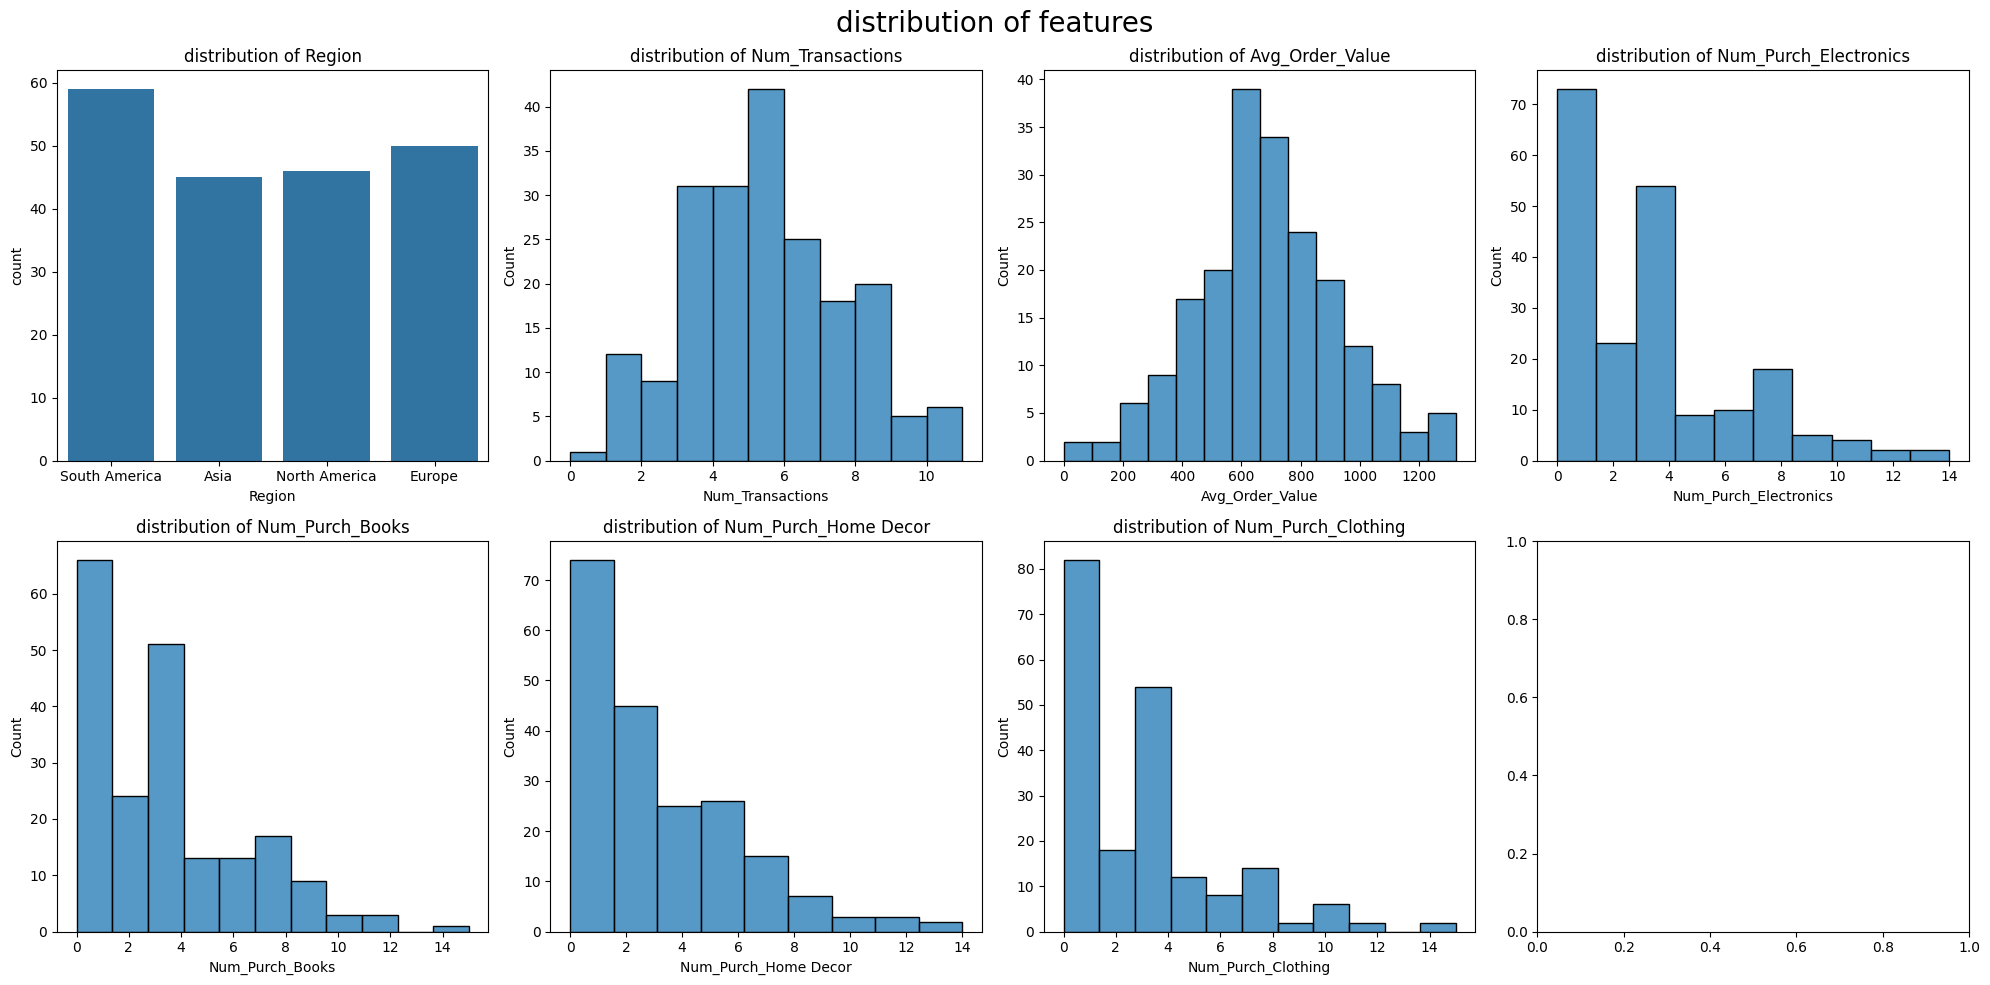

In [ ]:
plt.subplots(2, 4 , figsize=(20, 10))
plt.suptitle('distribution of features', fontsize=20)

for i, col in enumerate(df.columns[1:]):
  plt.subplot(2, 4, i+1)
  if df[col].dtype == 'object':
    sns.countplot(x=col, data=df)
  else:
    sns.histplot(x=col, data=df)
  plt.title(f'distribution of {col}')

plt.tight_layout()
plt.show()

In [258]:
df.fillna(0, inplace=True)

In [260]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

pre_process = ColumnTransformer(
    transformers=[
        ('Standard Scaler', StandardScaler(), ['Num_Transactions', 'Avg_Order_Value', 'Num_Purch_Electronics', 'Num_Purch_Books', 'Num_Purch_Home Decor']),
        ('One Hot Encoder', OneHotEncoder(handle_unknown='ignore'), ['Region'])
    ], remainder='passthrough'
)

processed_data = pre_process.fit_transform(df.drop(columns=['CustomerID']))

In [261]:
model = NearestNeighbors(n_neighbors=4, algorithm='auto', metric='cosine')
model.fit(processed_data)

NearestNeighbors(metric='cosine', n_neighbors=4)

In [262]:
distances, indeces = model.kneighbors([processed_data[0]])
df.iloc[indeces[0]]

,CustomerID,Region,Num_Transactions,Avg_Order_Value,Num_Purch_Electronics,Num_Purch_Books,Num_Purch_Home Decor,Num_Purch_Clothing
0,C0001,South America,5.0,670.904000,7.0,2.0,3.0,0.0
119,C0120,South America,3.0,823.340000,9.0,0.0,0.0,0.0
68,C0069,Europe,5.0,575.738000,9.0,0.0,1.0,0.0
90,C0091,South America,6.0,522.943333,12.0,0.0,4.0,4.0


In [263]:
lookalike_results = {}

for indx, row in enumerate(processed_data[:20]):
    distances, indeces = model.kneighbors([row])
    customers = []

    for i in range(1, 4):
      customers.append((df['CustomerID'].loc[indeces[0][i]], 1 - distances[0][i]))
    lookalike_results[df['CustomerID'].loc[indx]] = customers

print(lookalike_results)

{'C0001': [('C0120', 0.8281168035262676), ('C0069', 0.694568426136477), ('C0091', 0.5910685735075563)], 'C0002': [('C0178', 0.9762751237122005), ('C0159', 0.961129269322773), ('C0134', 0.9598087042943237)], 'C0003': [('C0195', 0.9691745439451461), ('C0133', 0.9644593343535376), ('C0031', 0.9634994221677708)], 'C0004': [('C0012', 0.9017064303372961), ('C0065', 0.8765300190207548), ('C0113', 0.8518232025815308)], 'C0005': [('C0007', 0.905296399493833), ('C0140', 0.8325248567248675), ('C0123', 0.747500685473571)], 'C0006': [('C0082', 0.9389617473003157), ('C0048', 0.9329671298964962), ('C0200', 0.9268485154515145)], 'C0007': [('C0005', 0.905296399493833), ('C0140', 0.8866937960154228), ('C0110', 0.8227514782325529)], 'C0008': [('C0194', 0.980155149402033), ('C0093', 0.9756845643375401), ('C0109', 0.9740126126397567)], 'C0009': [('C0198', 0.969006173135885), ('C0032', 0.9023971843508518), ('C0033', 0.8974141012938739)], 'C0010': [('C0111', 0.9882417233896666), ('C0056', 0.9817165106495852)

In [264]:
pd.DataFrame({'0':lookalike_results}).to_csv('Lookalike.csv')